# template matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('Computer-Vision-with-Python/DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

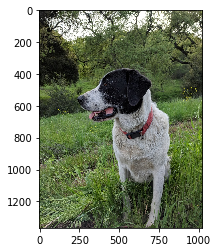

In [3]:
plt.imshow(full)

In [5]:
face= cv2.imread('Computer-Vision-with-Python/DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

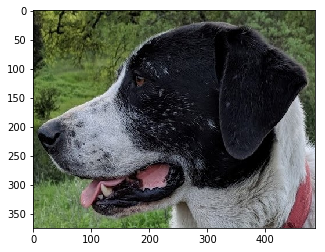

In [6]:
plt.imshow(face)

In [7]:
sum([1,2,3])
mystring = 'sum'
myfunc = eval(mystring)
myfunc([1,2,3])

6

In [8]:
height, width,channels = face.shape

In [9]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

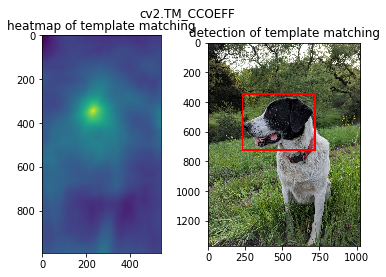

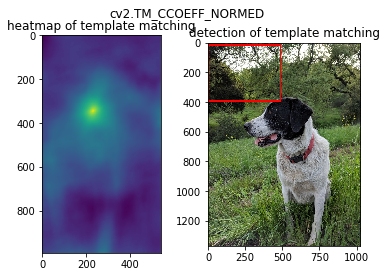

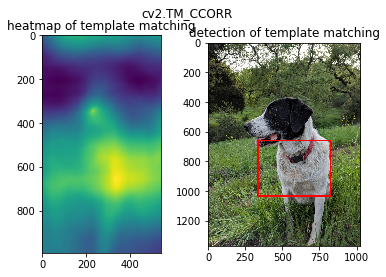

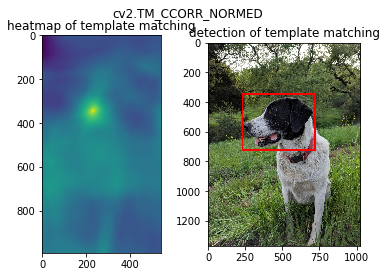

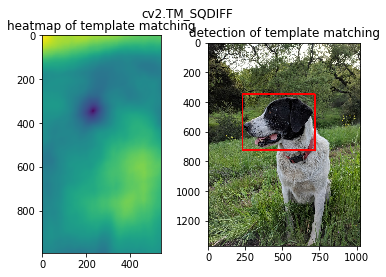

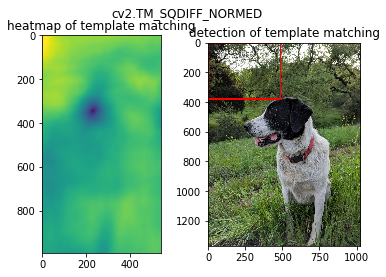

In [11]:
for m in methods:
    full_copy = full.copy()
    method= eval(m)
    res = cv2.matchTemplate(full_copy,face,method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_CCOEFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    height,width,channels = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('heatmap of template matching')
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('detection of template matching')
    
    plt.suptitle(m)
    plt.show()
    print('\n')
    print('\n')
    
        

# corner detection

In [12]:
import cv2 
import numpy as np  

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
flat_chess = cv2.imread('Computer-Vision-with-Python/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)


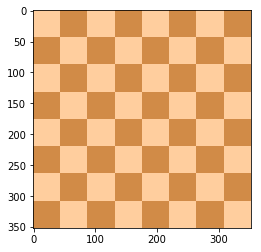

In [15]:
plt.imshow(flat_chess)

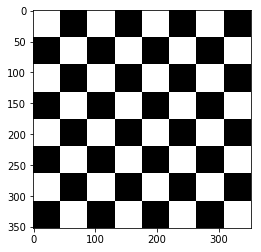

In [16]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

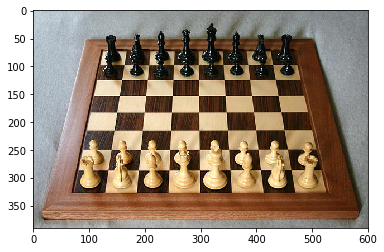

In [17]:
real_chess = cv2.imread('Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

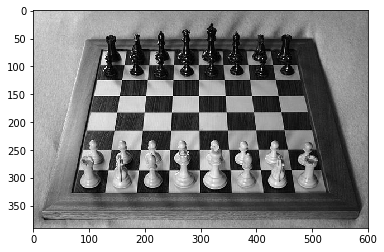

In [18]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

In [19]:
# Harris Corner Detection

gray = np.float32(gray_flat_chess)


In [20]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [21]:
dst = cv2.dilate(dst,None)

In [22]:
flat_chess[dst>0.1*dst.max()] = [255,0,0]

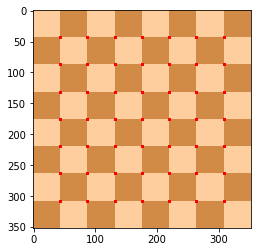

In [23]:
plt.imshow(flat_chess)

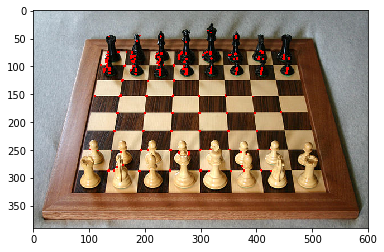

In [24]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)
real_chess[dst>0.1*dst.max()] = [255,0,0]
plt.imshow(real_chess)

In [ ]:
# Shi-Tomasi Corner Detector

